In [2]:
%cd D:/

D:\


In [3]:
import tensorflow as tf
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
import numpy as np

C:\Users\Jamaludeen\miniconda3\envs\PB_2735\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [4]:
model=load_model("D:/Jamaludeen2/retinalmodel")

In [5]:
ds_train=tf.keras.preprocessing.image_dataset_from_directory(
    "D:Jamaludeen2/Retinal Fundus Images/train",
    batch_size=8)
ds_test=  tf.keras.preprocessing.image_dataset_from_directory(
    "D:Jamaludeen2/Retinal Fundus Images/test",
    batch_size=8)
ds_val=tf.keras.preprocessing.image_dataset_from_directory(
    "D:Jamaludeen2/Retinal Fundus Images/val",
    batch_size=8)

Found 20077 files belonging to 11 classes.
Found 1236 files belonging to 11 classes.
Found 433 files belonging to 11 classes.


In [6]:
classes=ds_test.class_names

In [7]:
ds_test=ds_test.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [22]:
def predict(model,img):
    img_array=tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array=tf.expand_dims(img_array,0)
    
    predictions=model.predict(img_array)
    
    predicted_class=classes[np.argmax(predictions[0])]
    confidence=round(100*(np.max(predictions[0])),2)
    
    return predicted_class,confidence

1/1 [==============================] - 0s 62ms/step


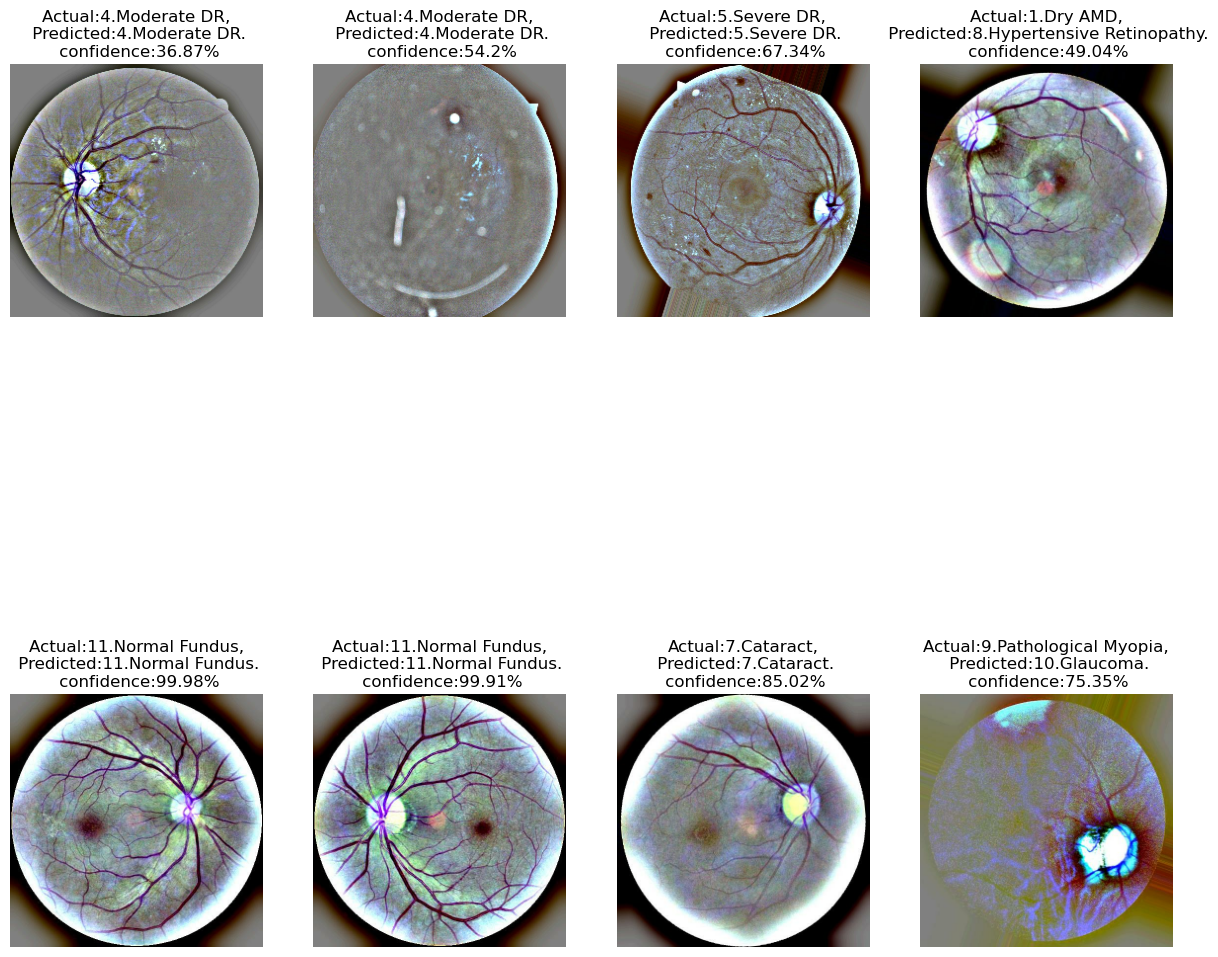

In [8]:
 plt.figure(figsize=(15,15))
for images,labels in ds_test.take(1):
    for i in range(8):
        ax=plt.subplot(2,4,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class,confidence=predict(model,images[i].numpy())
        actual_class=classes[labels[i]]
        
        plt.title(f"Actual:{actual_class},\n Predicted:{predicted_class}.\n confidence:{confidence}%")
        plt.axis("off")

In [9]:
#resnet model

In [10]:
model.evaluate(ds_test)


155/155 [==============================] - 28s 177ms/step - loss: 1.0228 - accuracy: 0.6157


[1.0227833986282349, 0.6156957745552063]

In [8]:
import tensorflow as tf
from tensorflow.keras import layers


In [9]:
def residual_block(x, filters, kernel_size=3, strides=1):
    y = layers.Conv2D(filters, kernel_size=kernel_size, strides=strides, padding='same')(x)
    y = layers.BatchNormalization()(y)
    y = layers.Activation('LeakyReLU')(y)
    
    if strides != 1 or x.shape[-1] != filters:
        x = layers.Conv2D(filters, kernel_size=1, strides=strides, padding='same')(x)
        
    return layers.Add()([x, y])


In [10]:
def build_resnet(input_shape, num_classes, num_filters=64, num_blocks=[1,1]):
    inputs = layers.Input(shape=input_shape)
    x = layers.Conv2D(num_filters, 3, padding='same')(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('LeakyReLU')(x)
    
    for i, num_layers in enumerate(num_blocks):
        num_filters *= 2 if i > 0 else 1
        x = residual_block(x, num_filters, strides=2)
        for _ in range(num_layers - 1):
            x = residual_block(x, num_filters)
    
    x = layers.GlobalAveragePooling2D()(x)
    outputs = layers.Dense(num_classes, activation='softmax')(x)
    
    model = tf.keras.Model(inputs, outputs)
    return model


In [11]:
input_shape = (256, 256, 3) 
num_classes = 11
resnet_model = build_resnet(input_shape, num_classes)


In [12]:
resnet_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [13]:
enumerate([2])

In [14]:
resnet_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 256, 256, 64)         1792      ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 256, 256, 64)         256       ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 256, 256, 64)         0         ['batch_normalization[0][0

In [15]:
count=0
for layer in resnet_model.layers:
    count+=1
    print(layer.name)
print(count)

input_1
conv2d
batch_normalization
activation
conv2d_1
batch_normalization_1
conv2d_2
activation_1
add
conv2d_3
batch_normalization_2
conv2d_4
activation_2
add_1
global_average_pooling2d
dense
16


In [16]:
ds_train=ds_train.shuffle(1000)
ds_train=ds_train.take(1000)
ds_train=ds_train.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
ds_val=ds_val.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [17]:
resize_and_rescale=tf.keras.Sequential(
    [layers.experimental.preprocessing.Resizing(256,256),
    layers.experimental.preprocessing.Rescaling(1.0/255)
    ])

In [18]:
data_augmentation=tf.keras.Sequential(
    [layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
     layers.experimental.preprocessing.RandomRotation(0.4),
     layers.experimental.preprocessing.RandomContrast((0.1,0.3))

])

In [19]:
resnet_model.fit(ds_train, epochs=20,verbose=1, validation_data=ds_val)

Epoch 1/20


1000/1000 [==============================] - 2755s 3s/step - loss: 1.3795 - accuracy: 0.4839 - val_loss: 7.1150 - val_accuracy: 0.1339
Epoch 2/20
1000/1000 [==============================] - 2601s 3s/step - loss: 1.0337 - accuracy: 0.5931 - val_loss: 27.6750 - val_accuracy: 0.2079
Epoch 3/20
1000/1000 [==============================] - 2541s 3s/step - loss: 0.9212 - accuracy: 0.6216 - val_loss: 2.8968 - val_accuracy: 0.1848
Epoch 4/20
1000/1000 [==============================] - 6132s 6s/step - loss: 0.8805 - accuracy: 0.6330 - val_loss: 3.2655 - val_accuracy: 0.3834
Epoch 5/20
1000/1000 [==============================] - 1716s 2s/step - loss: 0.8533 - accuracy: 0.6438 - val_loss: 2.4496 - val_accuracy: 0.4111
Epoch 6/20
1000/1000 [==============================] - 1266s 1s/step - loss: 0.8268 - accuracy: 0.6528 - val_loss: 15.9776 - val_accuracy: 0.0693
Epoch 7/20
1000/1000 [==============================] - 1142s 1s/step - loss: 0.7974 - accuracy: 0.6624 - val_loss: 17.5

In [ ]:
ds_train.class_names

In [20]:
resnet_model

1/1 [==============================] - 0s 120ms/step


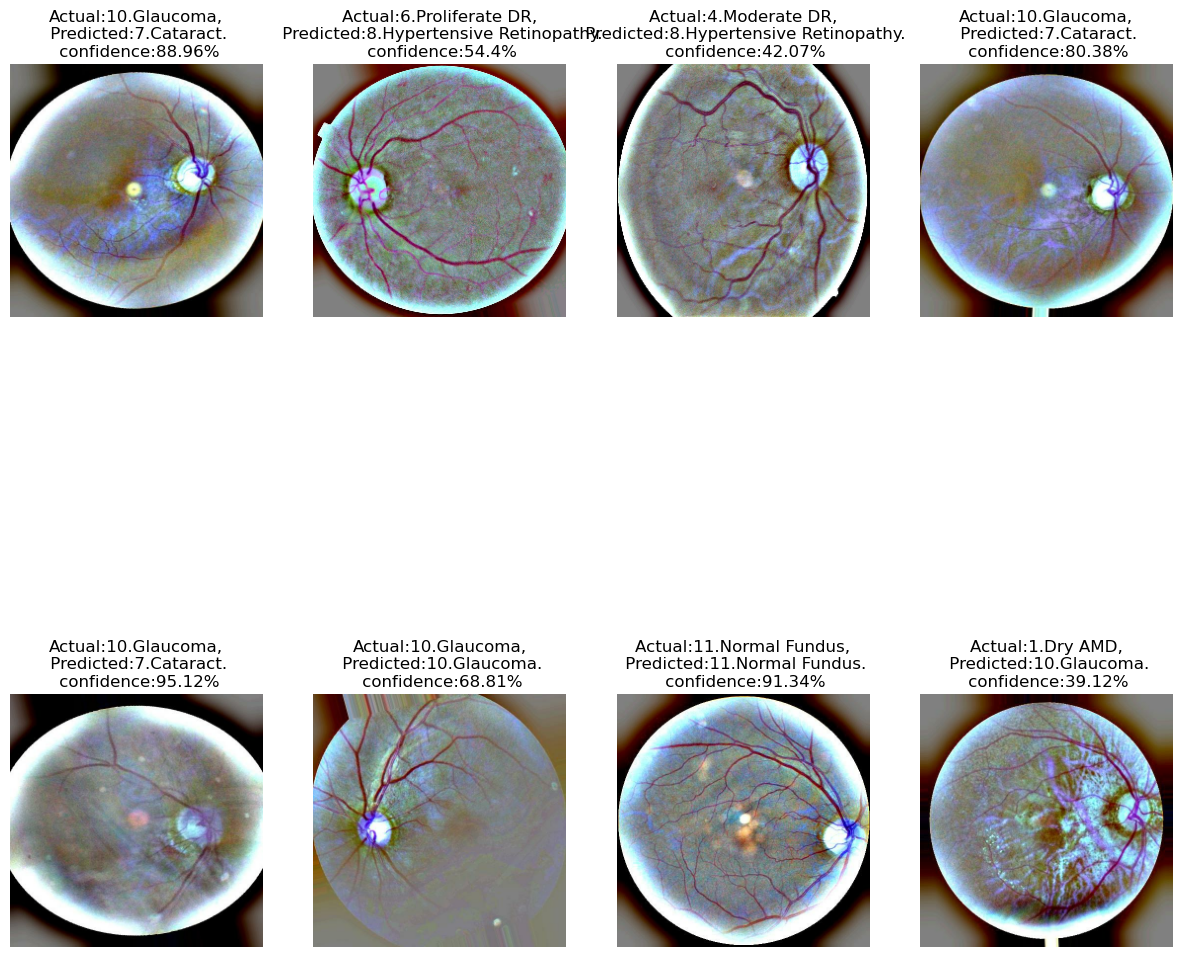

In [23]:
 plt.figure(figsize=(15,15))
for images,labels in ds_test.take(1):
    for i in range(8):
        ax=plt.subplot(2,4,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class,confidence=predict(resnet_model,images[i].numpy())
        actual_class=classes[labels[i]]
        
        plt.title(f"Actual:{actual_class},\n Predicted:{predicted_class}.\n confidence:{confidence}%")
        plt.axis("off")

In [24]:
resnet_model.evaluate(ds_test)

155/155 [==============================] - 84s 545ms/step - loss: 5.4427 - accuracy: 0.2540


[5.442678928375244, 0.254045307636261]

In [7]:
classes

['1.Dry AMD',
 '10.Glaucoma',
 '11.Normal Fundus',
 '2.Wet AMD',
 '3.Mild DR',
 '4.Moderate DR',
 '5.Severe DR',
 '6.Proliferate DR',
 '7.Cataract',
 '8.Hypertensive Retinopathy',
 '9.Pathological Myopia']